# MSDS 7331 - Lab Three: Clustering, Association Rules, or Recommenders

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab2)
- [Ben Brock](bbrock@smu.edu?subject=lab2)
- [Tom Elkins](telkins@smu.edu?subject=lab2)
- [Austin Kelly](ajkelly@smu.edu?subject=lab2)

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering</h3>
    <h3>Lab Instructions</h3>
    <p>In the final assignment for this course, you will be using one of three different analysis methods:</p>
    <ul>
    <li>Option A: Use transaction data for mining associations rules</li>
    <li>Option B: Use clustering on an unlabeled dataset to provide insight or features</li>
    <li>Option C: Use collaborative filtering to build a custom recommendation system</li>
    </ul>
    <p>This report is worth 20% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a single document. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.</p>
    <p>Your choice of dataset will largely determine the task that you are trying to achieve. Though the dataset does not need to change from your previous tasks. For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed. Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.</p>
    <p>Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using iPython notebooks as shown in lecture.</p>
     <p>Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. Describe all assumptions you make and include all code you use in the iPython notebook or as supplemental functions. Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline). This report is worth 20% of the final grade.</p>
    <p>Report Sections:</p>
    <ol>
        <li>[Business Understanding](#business_understanding) <b>(10 points)</b></li>
        <li>[Data Understanding](#data_understanding) <b>(20 points)</b></li>
        <li>[Modeling and Evaluation](#modeling_and_evaluation) <b>(50 points)</b></li>
        <li>[Deployment](#deployment) <b>(10 points)</b></li>
        <li>[Exceptional Work](#exceptional_work) <b>(10 points)</b></li>
    </ol>
</div>

<a id='business_understanding'></a>
## 1 - Business Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Business Understanding (<b>10 points total</b>)</h3>
    <ul>
    <li>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</li>
    <li>How will you measure the effectiveness of a good algorithm?</li>
    <li>Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</li>
    </ul>
</div>

<a id='data_understanding'></a>
## 2 - Data Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Data Understanding (<b>20 points total</b>)</h3>
    <ul>
    <li>[<b>10 points total</b>] [2.1 - Describe the meaning and type of data](#define_meaning).</li>
        <ul>
        <li>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</li>
        <li>Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</li>
        </ul>
    <li>[<b>10 points total</b>] [2.2 - Visualize data](#visualize_data).</li>
        <ul>
        <li>Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</li>
        </ul>
    </ul>
</div>

<a id='define_meaning'></a>
### 2.1 - Describe the meaning and type of data (10 points)
<ul>
<li>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</li>
<li>Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</li>
</ul>

<a id='define_meaning'></a>
### 2.2 - Visualize data (10 points)
<ul>
<li>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</li>
<li>Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</li>
</ul>

In [1]:
# generic imports
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# scikit imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier

# Read in the crime data from the CSV file
df = pd.read_csv('data/DC_Crime_2015_Lab2_Weather.csv')
#df_foodstamps = pd.read_csv('data/foodstamps.csv')
df_anc_data = pd.read_csv('data/ANC Data Unemployment and Housing Master.csv')

In [2]:
# how is the data represented?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 33 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

In [3]:
df_anc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
YR                85 non-null int64
ANC               85 non-null int64
ANC2              85 non-null object
ANC3              85 non-null object
Housing_Prices    85 non-null int64
Unemployment      85 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.1+ KB


<a id='modeling_and_evaluation'></a>
## 3 - Model and Evaluation
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Model and Evaluation (<b>50 points total</b>)</h3>
<p>Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results.</p>
<p><ul>
    <li><b>Option A: Cluster Analysis</b><ul>
        <li>Perform cluster analysis using several clustering methods</li>
        <li>How did you determine a suitable number of clusters for each method?</li>
        <li>Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).</li>
    <li>Describe your results. What findings are the most interesting and why?</li></ul>
    <li><b>Option B: Association Rule Mining</b><ul>
        <li>Create frequent itemsets and association rules.</li>
        <li>Use tables/visualization to discuss the found results.</li>
        <li>Use several measure for evaluating how interesting different rules are.</li>
        <li>Describe your results. What findings are the most compelling and why?</li>
    </ul></li>
    </ul>
</div>

## 3B - Association Rule Mining
Using our dataset for association rule mining required a few tweaks and a different perspective on the data.  Using the grocery list paradigm, our dataset consists of 36,489 transactions in which each "customer" (victim) "purchased" (experienced) the same number of "items" (conditions).

From previous labs, we knew that time, location, and some environmental parameters were important, so we kept them, but reduced the number of variables of each type and binned the continuous variables to make all of our "items" categorical.

* Offense code remained untouched, and was our desired "Right-hand side" for the rules.
* While latitude and longitude were used for location data in previous labs, binning these values could generate cross-jurisdictional bins, which would not be helpful for the customer.  We chose Police Service Area (PSA) to act as the location item since the superset of PSAs cover all geographic areas and the interpretation of the PSA is meaningful to the end user (the police departments).
* We saw previously that month was a factor, but it had a seasonal trend, so we grouped the month values into season bins:
  * "Winter" = Dec, Jan, Feb
  * "Spring" = Mar, Apr, May
  * "Summer" = Jun, Jul, Aug
  * "Fall" = Sep, Oct, Nov
* We also noted previously that the hour of the crime had a cyclic trend, so we grouped hours into period bins:
  * "Midnight" = 00:00 - 06:00
  * "Morning" = 06:00 - 12:00
  * "Afternoon" = 12:00 - 18:00
  * "Evening" = 18:00 - 24:00
* We saw that the day of the week had a trend which we grouped into Weekday and Weekend:
  * "Weekday" = Mon-Fri
  * "Weekend" = Sat-Sun
* Temperature and Humidity were averaged for the day, and (with Precipitation) were binned into categories as well:
  * "Temp < 33" = Average temperature between 14 - 33 degrees Fahrenheit
  * "Temp 33-52" = Average temperature between 33 and 52 degrees Fahrenheit
  * "Temp 52-71" = Average temperature between 52 and 71 degrees Fahrenheit
  * "Temp > 71" = Average temperature between 71 and 90 degrees Fahrenheit
  * "Humid 0-25%" = Average humidity between 0 and 25 percent
  * "Humid 25-50%" = Average humidity between 25 and 50 percent
  * "Humid 50-75%" = Average humidity between 50 and 75 percent
  * "Humid 75-100%" = Average humidity between 75 and 100 percent
  * "Precip 0-1" = Precipitation between 0 and 1 inches
  * "Precip 1-2" = Precipitation between 1 and 2 inches
  * "Precip 2-3" = Precipitation between 2 and 3 inches

With these categories defined, our dataset now looks like the following:

|Tx|Offense|PSA|AvgTmp|AvgHumid|Precip|Season|Weekday|Period|
|:-:|:-----|:-:|:----:|:------:|:----:|:----:|:-----:|:----:|
|1|Theft/Other|305|Temp>71|Humid 50-75%|Precip 0-1|Winter|Weekday|Afternoon|
|2|Theft/Auto|408|Temp 52-71|Humid 50-75%|Precip 0-1|Winter|Weekday|Morning|
|3|Theft/Other|302|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekend|Evening|
|...|...|...|...|...|...|...|...|...|
|36487|Robbery|704|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekday|Afternoon|
|36488|Theft/Other|707|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekday|Afternoon|
|36489|Theft/Other|707|Temp 33-52|Humid 25-50%|Precip 0-1|Spring|Weekday|Afternoon|

## Creating Frequent Itemsets
We had great difficulting trying to get the arules and arulesViz libraries to work on our machines.  So while one part of the Association Rules team worked on trying to get those (and related) libraries to work, the other part of the Association Rules team worked on developing custom software to implement frequent itemset generation.

The custom code was written in VBScript for ease of deployment - VBScript runs on any Windows computer and requires no special installation of any other tools or environments.  The code opens the transaction file and makes a single pass through the file.  The code uses a dictionary object to store the counts for each itemset, and a recursive function to generate the itemsets from the labels in the transaction.  This ensures that only itemsets that exist in the data are generated, although it will also generate rare itemsets.  In many cases, we need the additional itemsets in order to calculate Lift (which requires knowing the support for "left-hand" itemset).  And for project time constraints, we felt this was an acceptable side effect.

After the single pass through the transaction data, the code then makes a pass through the itemsets that were generated and counted, and can compute the support, confidence, and lift.  The code generates a CSV file of all rules.  We can then apply filters within Excel.

## Generating Visualization
The code then harvests the dictionary of itemsets found and generate visualizations from them.  The first visualization is a Support versus Confidence scatter plot.  The X coordinate is based on the support value: 0 at the left edge, 1 at the right edge.  The Y coordinate is based on the confidence value: 0 at the bottom edge, 1 at the top edge.  The "dot" is shaded based on all three attributes: Support = red, Confidence = green, Lift = blue.  Points that are black have low support, low confidence, and low lift; reddish points are higher in support, but lower in confidence and lift; greenish points are higher in confidence but lower in support and lift; bluish points are higher in lift, but lower in confidence and support.  The second visualization is a Support versus Lift scatter plot.  X-axis is support, and Y-axis is lift; colors are the same as the previous plot.  The third visualization is a matrix of the top rules (support > 20%, confidence > 20%).  The columns are the itemsets and the rows are the targets.  Points are placed where the itemsets are linked to the targets.  The color of the point is based on the support, and the size of the point is based on the confidence.

The visualization uses Scalable Vector Graphics (SVG) wrapped in HTML.  The visualizations can be rendered in modern web browsers.  The user can hover the mouse over the points of the scatter plot to see the rule associated with it.  Jupyter Notebooks, however, cannot render SVG, so the images are presented here as embedded graphics, with links to the HTML so the reader can interact with them.

The code is listed below.

```VBScript
Dim goFSO	: Set goFSO = CreateObject("Scripting.FileSystemObject")  '  Access to file system
Dim goRules : Set goRules = CreateObject("Scripting.Dictionary")      '  Dictionary storing itemsets/rules
Dim gaItems   '  Array of items
Dim gnRules   '  Number of rules found
Dim gnTx      '  Number of transactions
Dim goTopCol : Set goTopCol = CreateObject("Scripting.Dictionary")  ' Store columns for top rules
Dim goTopRow : Set goTopRow = CreateObject("Scripting.Dictionary")  ' Store rows for top rules
Dim goTopRule: Set goTopRule = CreateObject("Scripting.Dictionary") ' Store details for top rules
'
'	Process files that are dragged/dropped onto this script
For Each sFile In WScript.Arguments
	pdStart = Timer  ' Keep track of how long these operations take
	
	gnRules = 0
	gnTx = 0
	'
    '  Build the itemsets from the transaction data
	GenerateItemsets sFile
    '
    '  Build rules and visualization from itemsets
	GenerateRules sFile
	
	MsgBox "Processed " & gnTx & " transactions in file '" & sFile & "': Generated " & gnRules & " rules in " & Round(Timer-pdStart,2) & " seconds."
Next
'  End of main process
'

Sub GenerateItemsets(xsFile)
	Dim goData	: Set goData = goFSO.OpenTextFile(xsFile)  '  Open the transaction data file

	goData.Readline		'	Skip over the field header
	'
	'	Loop through the file
	While Not goData.AtEndOfStream
		'
		'	Read a transaction
		psTransaction = goData.Readline
		'
		'	Break the transaction into individual items
		gaItems = Split(psTransaction,",")
		'
        '   Build rule groups recursively
		Ruler "", 1
        '
        '   Increment transaction count
		gnTx = gnTx + 1
	WEnd
	'
	'	Close the input file
	goData.Close
End Sub

Sub GenerateRules(xsFile)
	'
	'	Get the input file's extension
	psExt = goFSO.GetExtensionName(xsFile)
	
	'	Replace the file extension with the _Rules indicator and CSV extension and HTML output files
	Dim goRuleFile: Set goRuleFile = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_Rules.csv"))
	Dim goSupVConf: Set goSupVConf = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_SvC.htm"))
	Dim goSupVLift: Set goSupVLift = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_SvL.htm"))
	Dim goTopRules: Set goTopRules = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_TopRules.csv"))
	Dim goRuleMatx: Set goRUleMatx = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_RuleMatrix.htm"))
	
	SetupSVC goSupVConf, xsFile
	SetupSVL goSupVLift, xsFile
	
	'	Write the field header
	goRuleFile.Writeline "LHS,RHS,Count,Support,Confidence,Lift"
	pnTopRules = 0

	'	Loop through the itemsets found in the previous step
	For Each psRule In goRules.Keys
		'
		'	Ignore itemsets that appear only once
		pnCnt = goRules(psRule)
		If pnCnt > 1 Then
			'
			'	Look for a multi-item set
			pnMult = InStr(2,psRule,":")
			
			'	Do we have a multi-item set?
			If pnMult > 0 Then
				'
				'	Separate the left-most item and make it our target
				sLHS = Left(psRule,pnMult-1)
				sRHS = Mid(psRule,pnMult)
				'
                '   Calculate support, confidence, and lift
				pdSup = Support(psRule)
				pdCnf = CDbl(pnCnt) / CDbl(goRules(sRHS))
				pdLft = Lift(sLHS,sRHS)
				'
                '  Create color based on support, confidence, and lift
				psRed = Right("0" & Hex(Round(pdSup * 255,0)), 2)
				psGrn = Right("0" & Hex(Round(pdCnf * 255,0)), 2)
				psBlu = Right("0" & Hex(Round(pdLft * 20.0,0)), 2)
				
				psItm = Mid(sRHS,2)
				psTgt = Mid(sLHS,2)
				
				'
				'	Write the rule, the count, the support, the confidence, and the lift for this rule
				goRuleFile.Write "{" & psItm & "},{" & psTgt & "}," & pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
				
				If (pdSup > 0.2) and (pdCnf > 0.2) Then
					'
					'   Top rules are support > 0.2 and confidence > 0.2
					pnTopRules = pnTopRules + 1
					goTopRules.Writeline "{" & psItm & "},{" & psTgt & "}," & pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
					'
					'	Set the unique column (items) label
					goTopCol(psItm) = psItm
					'
					'	Set the unique row (target) label
					goTopRow(psTgt) = psTgt
					'
					'	Save the rule
					goTopRule(psItm & "-->" & psTgt) = pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
				End If
				
				If Int(pdSup * 100) > 0 Then
					'
					'	Support v Confidence
					goSupVConf.Writeline "    <circle cx='" & Round(pdSup * 500,0) + 100 & "' cy='" & 500 - Round(pdCnf * 500,0) & "' r='5' style='fill:#" & psRed & psGrn & psBlu & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'><title>{" & Mid(sRHS,2) & "}&rarr;{" & Mid(sLHS,2) & "}</title></circle>"
					'
					'	Support v Lift
					goSupVLift.Writeline "    <circle cx='" & Round(pdSup * 500,0) + 100 & "' cy='" & 500 - Round(pdLft / 20 * 500,0) & "' r='5' style='fill:#" & psRed & psGrn & psBlu & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'><title>{" & Mid(sRHS,2) & "}&rarr;{" & Mid(sLHS,2) & "}</title></circle>"
				End If
			Else
				'
				'	Write the null-based rule, the count, and support
				goRuleFile.Write "{},{" & Mid(psRule,2) & "}," & goRules(psRule) & "," & Support(psRule)
			End If
			
			goRuleFile.Writeline
		End If
	Next
	goRuleFile.Close
	goSupVConf.Writeline "</svg></body></html>"
	goSupVConf.Close
	goSupVLift.Writeline "</svg></body></html>"
	goSupVLift.Close
	'
	'	Create the rule matrix plot
	If goTopRule.Count > 0 Then
		'
		'	How many unique columns?
		pnCol = goTopCol.Count
		'
		'	How many unique rows?
		pnRow = goTopRow.Count
		'
		'	Set the SVG window width to 30*Col + 300 (for row labels); height = 30 * row + 320 (for col labels)
		goRuleMatx.Writeline "<html><body style='font-family:Arial'><h1>Top Association Rules</h1><h3>" & goFSO.GetBaseName(xsFile) & "</h3><h5>Support > 20%; Color = Support; Size = Confidence</h5><svg width='" & (30.0 * pnCol) + 350 & "' height='" & (30.0 * pnRow) + 320 & "'>"
		'
		'	Loop through the column labels
		piLbl = 1
		For Each psLbl In goTopCol.Keys
			goRuleMatx.Writeline "<text x='" & (30 * (piLbl - 1)) + 65 & "' y='300' transform='rotate(-90 " & (30 * (piLbl - 1)) + 65 & ",300)'>{" & psLbl & "}</text>"
			goRuleMatx.Writeline "<line x1='" & (30 * (piLbl - 1)) + 60 & "' y1='315' x2='" & (30 * (piLbl - 1)) + 60 & "' y2='" & (30 * pnRow) + 330 & "' stroke='silver' stroke-dasharray='2,5'/>"
			piLbl = piLbl + 1
		Next
		'
		'	Loop through the row labels
		piLbl = 1
		For Each psLbl In goTopRow.Keys
			goRuleMatx.Writeline "<text x='" & (30 * pnCol) + 60 & "' y='" & (30 * (piLbl - 1)) + 330 & "'>{" & psLbl & "}</text>"
			goRuleMatx.Writeline "<line x1='50' y1='" & (30 * (piLbl - 1)) + 325 & "' x2='" & (30 * pnCol) + 50 & "' y2='" & (30 * (piLbl - 1)) + 325 & "' stroke='silver' stroke-dasharray='2,5'/>"
			piLbl = piLbl + 1
		Next
		'
		'	Loop through the rules
		piCol = 1
		For Each psItm In goTopCol.Keys
			piRow = 1
			For Each psTgt In goTopRow.Keys
				If goTopRule.Exists(psItm & "-->" & psTgt) Then
					paVal = Split(goTopRule(psItm & "-->" & psTgt),",")
					
					psRed = Right("0" & Hex(255 - Round(CDbl(paVal(1)) * 255,0)), 2)
					psGrn = Right("0" & Hex(Round(CDbl(paVal(2)) * 255,0)), 2)
					psBlu = Right("0" & Hex(Round(CDbl(paVal(3)) * 20.0,0)), 2)
					
					goRuleMatx.Writeline "<circle cx='" & (30 * (piCol - 1)) + 60 & "' cy='" & (30 * (piRow - 1)) + 325 & "' r='" & 30.0 * CDbl(paVal(2)) & "' style='fill:#FF" & psRed & psRed & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'/>"
				End If
				piRow = piRow + 1
			Next
			piCol = piCol + 1
		Next
		'
		goRuleMatx.Writeline "</svg></body></html>"
		goRuleMatx.Close
	End If
End Sub

Function Support(sRule)
	Support = CDbl(goRules(sRule)) / CDbl(gnTx)
End Function

Function Lift(sLeft, sRight)
	Dim pdLift
	On Error Resume Next
	pdLift = Support(sLeft & sRight) / (Support(sRight) * Support(sLeft))
	If Err.Number <> 0 Then pdLift = 0.0
	On Error Goto 0
	Lift = pdLift
End Function

Sub Ruler(sPrefix, nIndex)
	'
    '  Loop through the item labels
	For idx = nIndex to 8
		sWord = gaItems(idx)
		
		sItem = sPrefix & ":" & sWord
		
		If goRules.Exists(sItem) Then
            '
            '  Increment the count for this itemset
			goRules(sItem) = goRules(sItem) + 1
		Else
            '
            '  Start tracking this itemset
			goRules(sItem) = 1
			gnRules = gnRules + 1
		End If
		'
        '  Recursively generate itemsets if we aren't at the end of the items
		If idx < 8 Then Ruler sItem,idx + 1
	Next
End Sub

Sub SetupSVC(goHTM, xsFile)
	goHTM.Writeline "<html><body style='font-family:Arial'>"
	goHTM.Writeline "<h1>Support vs. Confidence</h1>"
	goHTM.Writeline "<h3>" & goFSO.GetBaseName(xsFile) & "</h3>"
	goHTM.Writeline "<svg width='620' height='600'>"
	goHTM.Writeline "<rect x='200' y='0' width='400' height='400' style='fill:#f0f0f0;'/>"
	goHTM.Writeline "<!-- vertical grid lines -->"
	goHTM.Writeline "<line x1='100' y1='0' x2='100' y2='510' stroke='black'/>"
	goHTM.Writeline "<line x1='200' y1='0' x2='200' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='300' y1='0' x2='300' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='400' y1='0' x2='400' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='500' y1='0' x2='500' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='600' y1='0' x2='600' y2='510' stroke='black'/>"
	goHTM.Writeline "<!-- Support labels -->"
	goHTM.Writeline "<text x='100' y='520' fill='black' text-anchor='middle'>0%</text>"
	goHTM.Writeline "<text x='200' y='520' fill='black' text-anchor='middle'>20%</text>"
	goHTM.Writeline "<text x='300' y='520' fill='black' text-anchor='middle'>40%</text>"
	goHTM.Writeline "<text x='400' y='520' fill='black' text-anchor='middle'>60%</text>"
	goHTM.Writeline "<text x='500' y='520' fill='black' text-anchor='middle'>80%</text>"
	goHTM.Writeline "<text x='600' y='520' fill='black' text-anchor='middle'>100%</text>"
	goHTM.Writeline "<text x='350' y='540' fill='black' text-anchor='middle'>Support</text>"
	goHTM.Writeline "<!-- horizontal grid lines -->"
	goHTM.Writeline "<line x1='90' y1='0' x2='600' y2='0' stroke='black'/>"
	goHTM.Writeline "<line x1='90' y1='100' x2='600' y2='100' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='200' x2='600' y2='200' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='300' x2='600' y2='300' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='400' x2='600' y2='400' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='500' x2='600' y2='500' stroke='black'/>"
	goHTM.Writeline "<!-- Confidence labels -->"
	goHTM.Writeline "<text x='85' y='10' fill='black' text-anchor='end'>100%</text>"
	goHTM.Writeline "<text x='85' y='105' fill='black' text-anchor='end'>80%</text>"
	goHTM.Writeline "<text x='85' y='205' fill='black' text-anchor='end'>60%</text>"
	goHTM.Writeline "<text x='85' y='305' fill='black' text-anchor='end'>40%</text>"
	goHTM.Writeline "<text x='85' y='405' fill='black' text-anchor='end'>20%</text>"
	goHTM.Writeline "<text x='85' y='505' fill='black' text-anchor='end'>0%</text>"
	goHTM.Writeline "<text x='50' y='250' fill='black' transform='rotate(-90 50,250)' text-anchor='middle'>Confidence</text>"
End Sub

Sub SetupSVL(goHTM, xsFile)
	goHTM.Writeline "<html><body style='font-family:Arial'>"
	goHTM.Writeline "<h1>Support vs. Lift</h1>"
	goHTM.Writeline "<h3>" & goFSO.GetBaseName(xsFile) & "</h3>"
	goHTM.Writeline "<svg width='620' height='600'>"
	goHTM.Writeline "<rect x='200' y='0' width='400' height='400' style='fill:#f0f0f0;'/>"
	goHTM.Writeline "<!-- vertical grid lines -->"
	goHTM.Writeline "<line x1='100' y1='0' x2='100' y2='510' stroke='black'/>"
	goHTM.Writeline "<line x1='200' y1='0' x2='200' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='300' y1='0' x2='300' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='400' y1='0' x2='400' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='500' y1='0' x2='500' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='600' y1='0' x2='600' y2='510' stroke='black'/>"
	goHTM.Writeline "<!-- Support labels -->"
	goHTM.Writeline "<text x='100' y='520' fill='black' text-anchor='middle'>0%</text>"
	goHTM.Writeline "<text x='200' y='520' fill='black' text-anchor='middle'>20%</text>"
	goHTM.Writeline "<text x='300' y='520' fill='black' text-anchor='middle'>40%</text>"
	goHTM.Writeline "<text x='400' y='520' fill='black' text-anchor='middle'>60%</text>"
	goHTM.Writeline "<text x='500' y='520' fill='black' text-anchor='middle'>80%</text>"
	goHTM.Writeline "<text x='600' y='520' fill='black' text-anchor='middle'>100%</text>"
	goHTM.Writeline "<text x='350' y='540' fill='black' text-anchor='middle'>Support</text>"
	goHTM.Writeline "<!-- horizontal grid lines -->"
	goHTM.Writeline "<line x1='90' y1='0' x2='600' y2='0' stroke='black'/>"
	goHTM.Writeline "<line x1='90' y1='100' x2='600' y2='100' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='200' x2='600' y2='200' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='300' x2='600' y2='300' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='400' x2='600' y2='400' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='500' x2='600' y2='500' stroke='black'/>"
	goHTM.Writeline "<!-- Lift labels -->"
	goHTM.Writeline "<text x='85' y='10' fill='black' text-anchor='end'>20</text>"
	goHTM.Writeline "<text x='85' y='105' fill='black' text-anchor='end'>16</text>"
	goHTM.Writeline "<text x='85' y='205' fill='black' text-anchor='end'>12</text>"
	goHTM.Writeline "<text x='85' y='305' fill='black' text-anchor='end'>8</text>"
	goHTM.Writeline "<text x='85' y='405' fill='black' text-anchor='end'>4</text>"
	goHTM.Writeline "<text x='85' y='505' fill='black' text-anchor='end'>0</text>"
	goHTM.Writeline "<text x='50' y='250' fill='black' transform='rotate(-90 50,250)' text-anchor='middle'>Lift</text>"
End Sub
```

The code was applied to both the current dataset for Lab 3 and the dataset created using the SMOTE method in lab 2.

|Dataset|Transactions|Rules|Time|
|:---|:----------:|:---:|---:|
|Offense dataset|36,489|542,315|286.37|
|SMOTE dataset|61,181|349,292|311.69|

<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_SvC.htm"><img src="images/Arules_SvC_Offense.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_SvL.htm"><img src="images/Arules_SvL_Offense.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_RuleMatrix.htm"><img src="images/Arules_Top_Offense.PNG"></a>

<a href="data/DC_Crime_2015_Lab3_ARules_VP_SvC.htm"><img src="images/Arules_SvC_SMOTE.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_VP_SvL.htm"><img src="images/Arules_SvL_SMOTE.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_VP_RuleMatrix.htm"><img src="images/Arules_Top_SMOTE.PNG"></a>

<a id='deployment'></a>
## 4 - Deployment
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Deployment (<b>10 points total</b>)</h3>
<p><ul>
<li>Be critical of your performance and tell the reader how your current model might be usable by other parties.</li>
<li>Did you achieve your goals? If not, can you reign in the utility of your modeling?</li>
<li>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?</li>
<li>How would your deploy your model for interested parties?</li>
<li>What other data should be collected?</li>
<li>How often would the model need to be updated, etc.?</li>
</ul>
</div>

<a id='exceptional_work'></a>
## 5 - Exceptional Work
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Exceptional Work (<b>10 points total</b>)</h3>
<p>You have free reign to provide additional analyses or combine analyses</p>
</div>

In [4]:
# generic imports
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# scikit imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier

# Read in the crime data from the CSV file
df = pd.read_csv('data/DC_Crime_2015_Lab2_Weather.csv')
#df_foodstamps = pd.read_csv('data/foodstamps.csv')
df_anc_data = pd.read_csv('data/ANC Data Unemployment and Housing Master.csv')

In [5]:
print(df.info())
print('')
print(df_anc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 33 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

In [6]:
# drop ANC2 and ANC3 from the df_anc_data DataFrame
# remove Unemployment and Housing_Prices because you will not have this information from crime reports
del df_anc_data['ANC2']
del df_anc_data['ANC3']

In [7]:
# create dummy codes given a list of attributes and dataframe
def dummy_code(attrib_list, df):
    for attrib in (attrib_list):
        tmp_df = pd.get_dummies(df[attrib], prefix=attrib)
        df = pd.concat((df, tmp_df),axis=1) # add back into the dataframe
    
        del df[attrib] # remove attribe
    return df

In [8]:
if 'END_DATE' in df:
    # convert END_DATE to datetime
    df.END_DATE = pd.to_datetime(df.END_DATE)
    
    # add YR to merge on with foodstamp df
    df['YR'] = df.END_DATE.map(lambda x: x.year)
    df.YR = df.YR.astype('int64')
    
    # merge ANC data into df
    df = pd.merge(df, df_anc_data, on=['ANC', 'YR'])
    
    # drop temp YR
    del df['YR']

In [9]:
# remove attributes that aren't useful
for attrib in ('REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'DISTRICT', 'PSA', 'WARD', 'CENSUS_TRACT', 
               'VOTING_PRECINCT', 'CRIME_TYPE', 'CCN', 'XBLOCK', 'YBLOCK', 'START_DATE', 'DistrictID', 'SHIFT_Code', 
               'METHOD_Code', 'AGE', 'TIME_TO_REPORT', 'END_DATE', 'PSA_ID', 'NEIGHBORHOOD_CLUSTER',
               'OFFENSE_Code', 'Latitude', 'Longitude', 'Max_Temp', 'Min_Temp', 'Max_Humidity', 'Min_Humidity', 
               'Min_Pressure', 'Max_Pressure', 'Precipitation'):
    if attrib in df:
        del df[attrib]

In [10]:
# do we look good?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 3 columns):
ANC               36489 non-null int64
Housing_Prices    36489 non-null int64
Unemployment      36489 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [11]:
# print a data record for a given row index value
df.ix[1234]

ANC                   11.0
Housing_Prices    660000.0
Unemployment           7.7
Name: 1234, dtype: float64

### Here we set up the data for classification

In [12]:
# create X and y
y = df['ANC']
X = df[['Housing_Prices', 'Unemployment']]
X_transformed = StandardScaler().fit_transform(X)

Size of the dataset: (36489, 3)
Number of unique ANC types: 40

ANC Percentage
ANC
11    5.744197
12    5.313930
13    2.071857
14    0.956453
21    2.170517
22    5.467401
23    4.014909
24    0.422045
25    2.866617
26    3.228370
32    0.476856
33    1.244211
34    0.600181
35    1.685439
36    0.775576
37    0.622105
41    2.318507
42    2.663816
43    2.907726
44    1.340130
51    1.101702
52    1.934830
53    4.099866
54    3.280441
55    3.524350
61    3.296884
62    4.524651
63    3.242073
64    2.225328
65    3.058456
72    2.195182
73    2.699444
74    2.403464
75    2.060895
76    2.639152
81    2.408945
82    2.258215
83    2.417167
84    1.740250
85    1.997862
Name: ANC, dtype: float64
Mean: 2.5, Standard deviaion: 1.32662131416


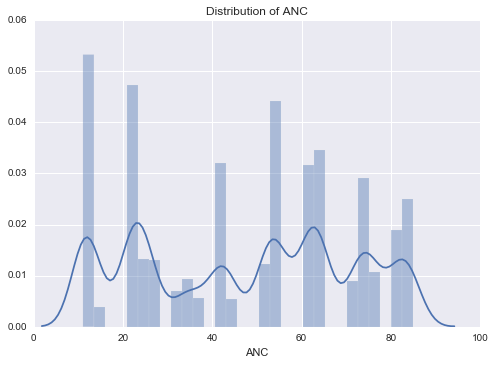

In [13]:
# examine what our data
print('Size of the dataset:', df.shape)
print('Number of unique ANC types:', len(df.ANC.unique()))

print('')
print('ANC Percentage')
y_series = pd.Series(y)
y_tot = y_series.count()
y_grp = y_series.groupby(y_series)
y_pct = y_grp.count() / y_tot * 100.
print(y_pct)
print('Mean: {}, Standard deviaion: {}'.format(y_pct.mean(), y_pct.std()))

# plot distribution
ax = sns.distplot(y)
plt.title('Distribution of ANC')
plt.show()

### Classification base accuracy

In [14]:
# leveraging concept from 06 Classification notebook
yhat = np.zeros(y.shape)

# classifier                           
clf = RandomForestClassifier(n_estimators=200,
                             n_jobs=-1, class_weight='balanced')

skf = StratifiedKFold(n_splits=10, random_state=0)

acc = cross_val_score(clf, X=X_transformed, y=y, cv=skf)

print('Average accuracy =', acc.mean()*100, '+/-', acc.std()*100)

Average accuracy = 99.8402063989 +/- 0.470365872735


### Base Visualization

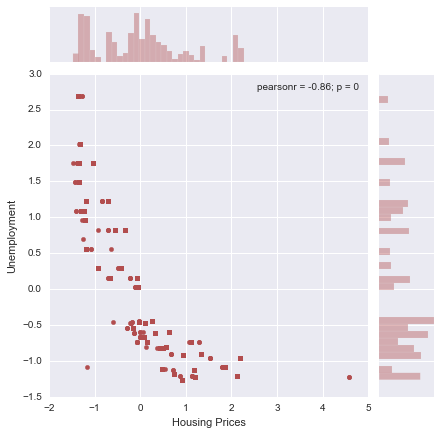

In [15]:
sns.set_palette("Set1", 8, .5)

X1 = X_transformed

ax = sns.jointplot(x=X1[:, 0], y=X1[:, 1])
ax.set_axis_labels(xlabel='Housing Prices', ylabel='Unemployment')
plt.show()

## Clustering

Code adapted from 09. Clustering Discretization, 10. Clustering Validity, and assignment 4 notebooks.

In [16]:
from sklearn import metrics


def eval_cluster(labels, labels_true, data):
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
#     print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labels))
    
def plot_cluster(data, feature, xlabel, ylabel):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(X1[:, 1].shape)/2, c=feature, 
                cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show() 
    
def store_best_result(data, acc, attribs):
    mean = acc.mean()*100
    std = acc.std()*100
    
    if data['acc']<(mean+std):
        data['acc'] = (mean + std)
        for k, v in attribs.iteritems():
            data[k] = v
    return mean, std

### Mini Batch KMeans

In [17]:
from sklearn.cluster import MiniBatchKMeans

kmeans_best_result = {'acc':0, 'clusters':0}
for clusters in range(53, 58):
    cls = MiniBatchKMeans(n_clusters=clusters, init='k-means++', random_state=1)
    cls.fit(X_transformed)
    X_new = pd.get_dummies(cls.labels_)
    
    acc = cross_val_score(clf, X=X_new, y=y, cv=skf)

    mean, std = store_best_result(kmeans_best_result, acc, {'clusters':clusters})
    print('KMeans: clusters =',  clusters, ', average accuracy =', mean, '+/-', std)

print('best clusters =', kmeans_best_result['clusters'])

KMeans: clusters = 53 , average accuracy = 99.8265486657 +/- 0.476663133235
KMeans: clusters = 54 , average accuracy = 99.8182819255 +/- 0.501377552157
KMeans: clusters = 55 , average accuracy = 99.8237930856 +/- 0.484900299382
KMeans: clusters = 56 , average accuracy = 99.785455299 +/- 0.536039588567
KMeans: clusters = 57 , average accuracy = 99.7856055077 +/- 0.501457379613
best clusters = 56


#### Visualize best cluster

Clusters: 56
Estimated number of clusters: 47
Homogeneity: 0.998
Completeness: 0.996
V-measure: 0.997
Adjusted Rand Index: 0.997
Adjusted Mutual Information: 0.996


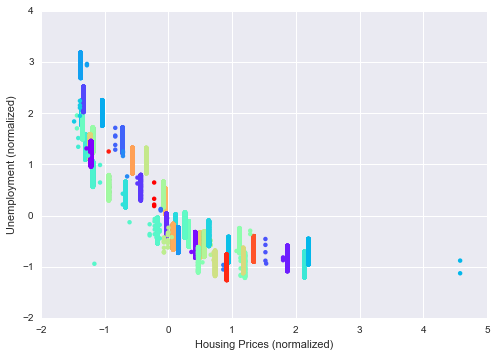

In [18]:
clusters = kmeans_best_result['clusters']
print('Clusters:', clusters)

cls = MiniBatchKMeans(n_clusters=clusters, init='k-means++', random_state=1)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y, X_transformed)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

### Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering


agg_best_result = {'acc':0, 'link':None, 'clusters':0}
for link in ['ward', 'complete', 'average']:
    for clusters in range(44, 48):

        # append on the clustering
        cls = AgglomerativeClustering(n_clusters=clusters, linkage=link)
        cls.fit(X_transformed)
        X_new = pd.get_dummies(cls.labels_)

        acc = cross_val_score(clf, X=X_new, y=y, cv=skf)
        
        mean, std = store_best_result(agg_best_result, acc, {'clusters':clusters, 'link':link})
        print('Agglomerative: clusters =',  clusters, ', link =', link, ', average accuracy =', mean, '+/-', std)
        
print('best clusters =', agg_best_result['clusters'], ', link = ', agg_best_result['link'])       

#### Visualize best cluster

In [ ]:
clusters = agg_best_result['clusters']
link = agg_best_result['link']
print('Clusters:', clusters)
print('Link:', link)

cls = AgglomerativeClustering(n_clusters=clusters, linkage=link)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y, X_transformed)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

### DBSCAN

Code adopted from `scikit-learn` demo page.

In [ ]:
from sklearn.cluster import DBSCAN

db_best_result = {'acc':0, 'clusters':0, 'eps':0, 'min_samples':0}
for eps in [0.001, 0.01, .1]:
    for min_samples in [2, 3, 4]:
        cls = DBSCAN(eps=eps, min_samples=min_samples)
        cls.fit(X_transformed)

        X_new = pd.get_dummies(cls.labels_)

        acc = cross_val_score(clf, X=X_new, y=y, cv=skf)

        labels = cls.labels_
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        mean, std = store_best_result(db_best_result, acc, {'clusters':clusters, 'eps':eps, 
                                                            'min_samples':min_samples})
        print('DBSCAN: clusters =',  clusters, ', eps =', eps, ', min_samples =', min_samples,
              ', average accuracy =', mean, '+/-', std)
    
print('best clusters =', db_best_result['clusters'], ', eps = ', db_best_result['eps'],
      ', min_samples =', db_best_result['min_samples'])  

#### Visualize best cluster

In [ ]:
eps = db_best_result['eps']
min_samples = db_best_result['min_samples']
print('eps:', eps)
print('min_samples:', min_samples)

cls = DBSCAN(eps=eps, min_samples=min_samples)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y, X_transformed)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

#### Comparison of cluster visual plots
1. Not Clustered
2. Mini Batch KMeans
3. Agglomerative
4. DBSCAN

In [ ]:
![Clusters Comparisons](images/cluster_comparison.png "Comparison of Clusters") 